## Unit 2 - Project 4

### Students:
- Ana Paula Souza
- Matheus Batistussi
- Romildo Oliveira
- Thaian Assis

## Introduction

On this assignment, we decided to take a look at the grades that students from the Information Technology major had in the past six semesters in seven specific courses. Our goal was to see if there is some correlation between where the students live and how they perform academically.

In [ ]:
!pip install geocoder
!pip install tqdm
!pip install folium

%pylab inline

# Import pandas
import pandas as pd

# Assign spreadsheet filename: file
file = 'imd_student_blind.xlsx'

# Load spreadsheet: xl
xl = pd.ExcelFile(file)

# Print sheet names
print(xl.sheet_names)

import geocoder
from tqdm import tqdm
import folium

In [ ]:
# Load a sheet into a DataFrame by index: df
df = xl.parse(0)

# Print the head of the DataFrame df
df.head()

In [ ]:
df.columns

In [ ]:
df.shape

## Average approval rate

Below is a pie chart showing how many students were approved on these six courses combined in the past six semesters. We can see that almost half of them fail the class, with only 57% of the students being approved.

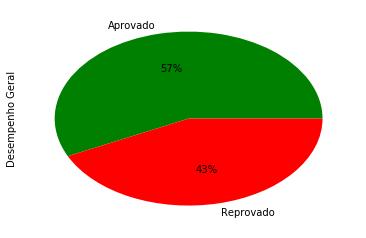

In [5]:
df["status.disciplina"].value_counts().sort_index().plot.pie(autopct="%1.0f%%", label="Desempenho Geral", colors=["green", "red"])

## Approval rate per course per year

Below we can see how students fared in each course in the years of 2014, 2015 and 2016. Each column represents a year, while each row shows the data of a specific course and how many students were approved in that year.

We can see that there was an increase in the approval rate for course 0 in 2016. In the two previous years, less than half of the students were approved, while in 2016 there was a jump of more than 50% in the approval rate for that course. A similar phenomena happened with course 3, where we can see that the approval rate jumped from 30% to 76%

Meanwhile, the opposite happened with course 2, in which just 38% of the students were approved, down from 81% in 2015.

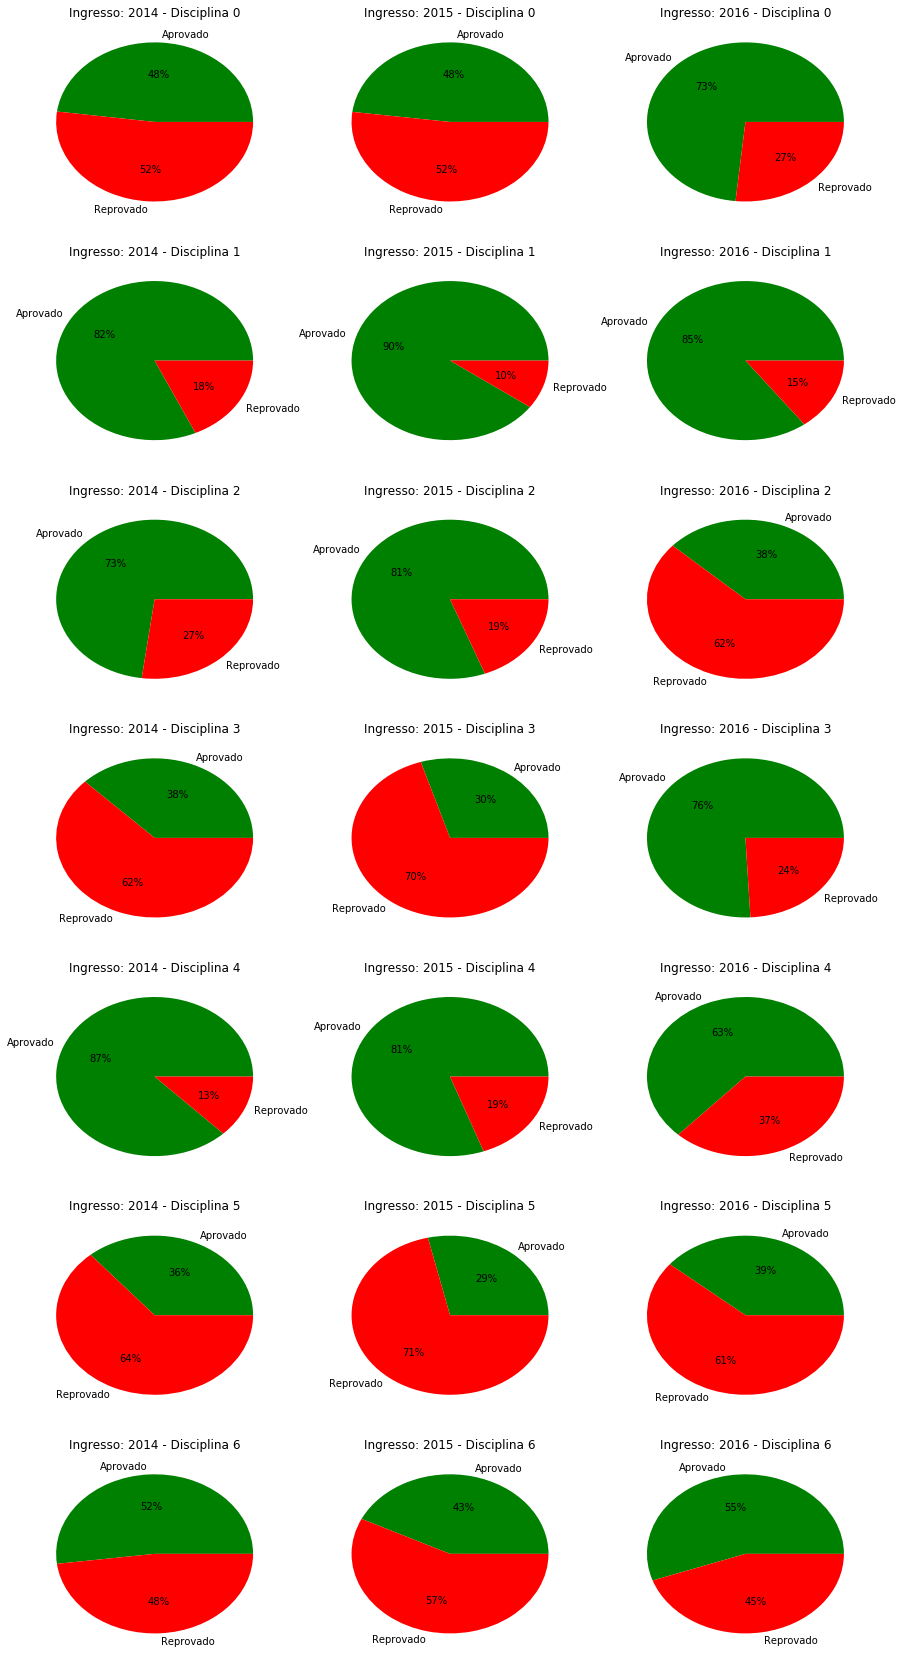

In [6]:
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15,30))

for ano in df.ano_ingresso.unique():
    for d in df.disciplina_ID.unique():
        df[(df.disciplina_ID == d) & (df.ano_ingresso == ano)]["status.disciplina"].value_counts().sort_index().plot.pie(autopct="%1.0f%%", ax=axes[d, ano-2014], title="Ingresso: "+str(ano)+" - Disciplina "+str(d), label="", colors=["green", "red"])


In [7]:
# df['lat'], df1['long'] = [0, 0]
# df = df.drop_duplicates(subset="a_ID")

In [8]:
# for i in tqdm(range(len(df))):
#     if(df.loc[i,'CEP'] != 0):
#         g = geocoder.google(df.loc[i,'CEP'])
#         df.ix[i,'lat'] = g.lat
#         df.ix[i,'long'] = g.lng
# print('Geocoding complete!')

## Finding the distance from each student to UFRN

Using the ZIP Code from each student we were able to find the coordinates from where each of them lived. Using this data, we can also find the distance from each student's home to the university, so later we can see if there is a correlation between the distance they have to travel each day to their academic performance.

In [9]:
df2= pd.ExcelFile("new_imd_student_blind.xlsx").parse(0)

In [10]:
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6367 * c
    return km

df['distance'] = 0
for i in tqdm(range(len(df2))):
    if((not (math.isnan(df2.ix[i,'lat']) or df2.ix[i,'lat'] == 0)) and (not (math.isnan(df2.ix[i,'long']) or df2.ix[i,'long'] == 0))):
        df2.ix[i,'distance'] = haversine(df2.loc[i,'long'],df2.loc[i,'lat'],-35.2053452,-5.8321259)

100%|██████████| 900/900 [00:00<00:00, 2018.52it/s]


In [11]:
# writer = pd.ExcelWriter('new_imd_student_blind.xlsx')
# pd.DataFrame(df).reset_index().to_excel(writer)
# writer.save()

## Plotting students' grades on a map

Using the coordinates from each student, we can put a pin in a map representing each student. The pins are color-coded, green representing the students with an average grade above 7, blue representing those between 5 and 7, orange to show the ones between 3 and 5, and finally red, which represents those with an average grade under 3.

Based on the map, we can notice that students living in the metropolitan region of Natal tend to perform worse than those living in Natal. Between those who live in Natal, distance doesn't seem to be an important factor on the students' grades, but their neighborhood seems to impact it. The ones who live in middle or high-class neighborhoods tend to perform better than their peers who live in lower-class neighborhoods. Since the ones who have a higher income tend to have access to better education, this disparity may be explained due to the better basic education that those students received, which allowed them to have a better base and equipped them to grasp the courses' content more easily.

In [12]:
# Set map center and zoom level
mapc = [0, 30]
zoom = 2

# Create map object
map_osm = folium.Map(location = [-5.8321259, -35.2053452],
                    zoom_start=14)
# Plot each of the locations that we geocoded
for j in tqdm(range(len(df2))):
    if((not (math.isnan(df2.ix[j,'lat']) or df2.ix[j,'lat'] == 0)) and (not (math.isnan(df2.ix[j,'long']) or df2.ix[j,'long'] == 0))):
        if(df2.ix[j,'nota'] > 7):
            folium.Marker([df2.ix[j,'lat'], df2.ix[j,'long']],
                icon=folium.Icon(color='green',icon='info-sign')
                ).add_to(map_osm)
        elif(df2.ix[j,'nota'] >= 5):
            folium.Marker([df2.ix[j,'lat'], df2.ix[j,'long']],
                icon=folium.Icon(color='blue',icon='info-sign')
                ).add_to(map_osm)
        elif(df2.ix[j,'nota'] >= 3):
            folium.Marker([df2.ix[j,'lat'], df2.ix[j,'long']],
                icon=folium.Icon(color='orange',icon='info-sign')
                ).add_to(map_osm)
        elif(df2.ix[j,'nota'] < 3):
            folium.Marker([df2.ix[j,'lat'], df2.ix[j,'long']],
                icon=folium.Icon(color='red',icon='info-sign')
                ).add_to(map_osm)
            
# Show the map
map_osm

100%|██████████| 900/900 [00:05<00:00, 156.60it/s]


## Heatmap showing where are the students

This heatmap shows where the students are concentrated. As we can see, there are more students living in the east and south zones than in the west and north zones of Natal, despite the latter being where most of the population currently lives.

In [13]:
from folium.plugins import HeatMap

# Set map center and zoom level
mapc = [0, 30]
zoom = 2

coordinates = []

for i in range(len(df2)):
    # eliminate items with'nan' element
    if all(~np.isnan([df2.ix[i,'lat'], df2.ix[i,'long'], df2.ix[i,'nota']])):
        coordinates.append([df2.ix[i,'lat'], df2.ix[i,'long'], df2.ix[i,'nota']])

# Create map object
m = folium.Map(location = [-5.8321259, -35.2053452],
                    zoom_start=13)

HeatMap(coordinates).add_to(m)

m

## OLS Regression analysis

Below we can see that the R-squared between the distance from the university and the average grades of the students is just 0.008, showing that there is no correlation between those two variables. As we saw before, a stronger indicator of academic performance is the neighborhood that the student lives.

                            OLS Regression Results                            
Dep. Variable:               distance   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     7.374
Date:                Wed, 10 May 2017   Prob (F-statistic):            0.00674
Time:                        20:50:32   Log-Likelihood:                -5935.6
No. Observations:                 900   AIC:                         1.188e+04
Df Residuals:                     898   BIC:                         1.188e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         52.1124     11.388      4.576      0.0

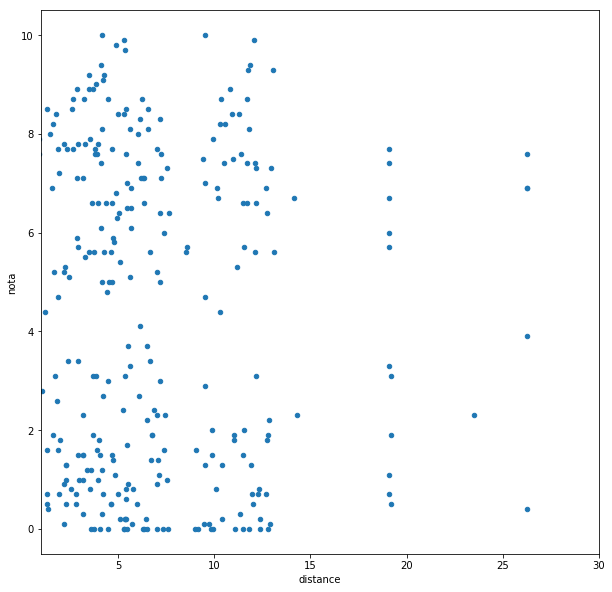

In [14]:
df3 = df2[['distance', 'nota']].copy()
df3.plot(kind='scatter', x='distance', y='nota', xlim=(1,30), figsize=(10,10))

import statsmodels.api as sm
X = sm.add_constant(df3.iloc[:,1])
# y is the values of the monthly returns of the stock = the first column
y = df3.iloc[:,0]

# creating the model
model = sm.OLS(y,X).fit()

# lets see what we got so far
print (model.summary())


/opt/conda/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


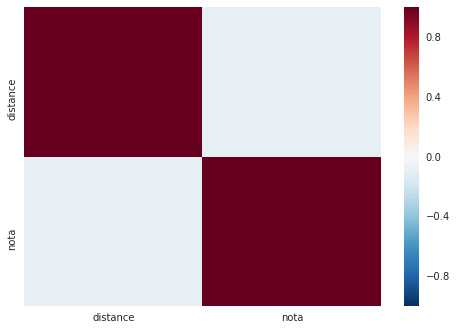

In [15]:
import seaborn as sns
corr = df3.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## Regression analysis of the students who cancelled their college registration

We also looked at the correlation between distance and grades for the students who cancelled their registration and are no longer in this major. As we can see, the r-squared is just slightly higher, but there is no significant correlation between those two variables, reinforcing the idea that distance from university and grades are not related.

                            OLS Regression Results                            
Dep. Variable:               distance   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.657
Date:                Wed, 10 May 2017   Prob (F-statistic):              0.104
Time:                        20:50:33   Log-Likelihood:                -1679.2
No. Observations:                 242   AIC:                             3362.
Df Residuals:                     240   BIC:                             3369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         63.2143     23.497      2.690      0.0

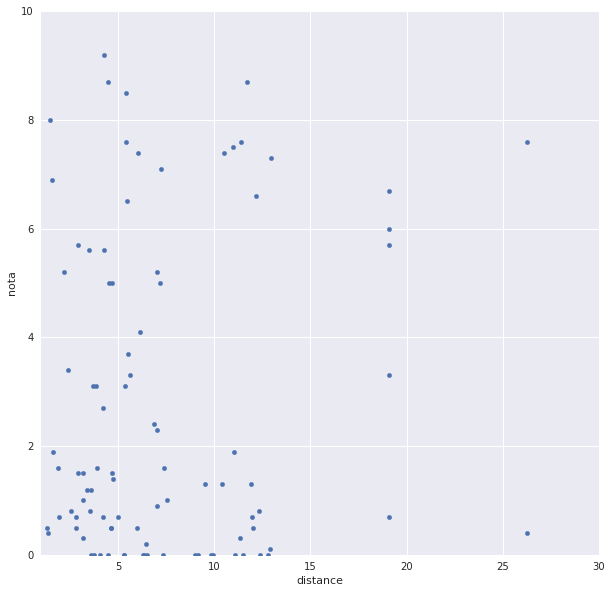

In [16]:

df4 = pd.ExcelFile("novo_imd_student_blind.xlsx").parse(0)
df5 = df4[['distance', 'nota']].copy()
df6 = df5.iloc[658:901]
df6.plot(kind='scatter', x='distance', y='nota', xlim=(1,30), ylim = (0,10), figsize=(10,10))

import statsmodels.api as sm
X = sm.add_constant(df6.iloc[:,1])
# y is the values of the monthly returns of the stock = the first column
y = df6.iloc[:,0]

# creating the model
model = sm.OLS(y,X).fit()

# lets see what we got so far
print (model.summary())
